# TUMO
## Assignment 1: Music Representation

In [1]:
%matplotlib inline
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *
# import fmp
print('runs!')

runs!


In [2]:
plt.rcParams['figure.figsize'] = (12, 4)

## Exercise 1

Below is a video of Lang Lang, world famous concert pianist, playing Frederic Chopin's "Minute Waltz".

The sheet music for this piece is readily available online - look it up!

Questions:
1. How long is Lang Lang's rendition of this piece (approximately, in seconds)?
- How many measures are there in the score?
- How many measures are actually played in this recording? [hint, there is a repeated section]


In [3]:
ipd.YouTubeVideo('hKILwVH_MdM')


ipd.YouTubeVideo('hKILwVH_MdM')



# Answers:


In [4]:
100
145
120

120

##### Exercise 2

Using the same score as in Exercise 1, write out what the Standard MIDI File (SMF) representation would look like for measure 5 of the Chopin Waltz.

- Assume a "ticks per quarter" value of 120.
- Remember that each midi event's tick value is a delta tick from the previous event.
- Assign channel 1 to the left hand and channel 2 to the right hand.
- Use note velocity = 60 for the beginning, but note that there is a slight crescendo at the end of the bar.
- Create your answer as a python array of events, where each event is a tuple of the format:
    `(<delta-tick>, <event-type>, <channel>, <pitch>, <velocity>)`
- It should look a bit like [_Fig 1.13b_](data/midi_table.png) of the text.

The first event is created for you as an example.

In [24]:
chopin_sequence = np.array([
    #2 G on
    (0, 'note_on', 2, 67, 60, 0),
    #1 D on
    (0, 'note_on', 1, 49, 60, 0),
    #2 G off
    (60, 'note_off', 2, 67, 0, 0),
    #2 A on
    (0, 'note_on', 2, 68, 60, 0),
    #1 D off
    (60, 'note_off', 1, 49, 0, 0),
    #2 A off
    (0, 'note_off', 2, 68, 0, 0),
    #2 C on
    (0, 'note_on', 2, 72, 60, 0),
    #1 F on
    (0, 'note_on', 1, 65, 60, 0),
    #1 A on
    (0, 'note_on', 1, 56, 60, 0),
    #1 D on
    (0, 'note_on', 1, 61, 60, 0),
    #2 C off
    (60, 'note_off', 2, 72, 0, 0),
    #2 B on
    (0, 'note_on', 2, 70, 60, 0),
    #2 B off
    (60, 'note_off', 2, 70, 0, 0),
    #1 F off
    (0, 'note_off', 1, 65, 0, 0),
    #1 A off
    (0, 'note_off', 1, 56, 0, 0),
    #1 D off
    (0, 'note_off', 1, 61, 0, 0),
    #2 G on
    (0, 'note_on', 2, 67, 80, 0),
    #1 F on
    (0, 'note_on', 1, 65, 80, 0),
    #1 A on
    (0, 'note_on', 1, 56, 80, 0),
    #1 D on
    (0, 'note_on', 1, 61, 80, 0),
    #2 G off
    (60, 'note_off', 2, 67, 0, 0),
    #1 F off
    (0, 'note_off', 1, 65, 0, 0),
    #1 A off
    (0, 'note_off', 1, 56, 0, 0),
    #1 D off
    (0, 'note_off', 1, 61, 0, 0),
    #2 A on
    (0, 'note_on', 2, 68, 0, 0),
    #2 A off
    (60, 'note_off', 2, 68, 0, 0)
]
)
len(chopin_sequence)
k=0
for i in range (len(chopin_sequence)):
    if(chopin_sequence[i][1]=='note_off'):
        k+=1
print(k)

13


## Exercise 3

1. Write a python function that returns the frequency (in Hertz) of a given MIDI pitch, assuming equal tempered tuning. Test it out with `p = 69` (answer should be 440.0) and an octave lower.

- Write a python function that returns the midi-pitch from any frequency (also with equal tempered tuning). The midi-pitch value should be a floating-point value. Do not round it to the nearest integer.

In [6]:
import math
def pitch_to_freq(p):
    f = 2**((p-69)/12)*440
    return f

     

def freq_to_pitch(f):
    p = 69+12*math.log2(f/440)
    return p

pitch_to_freq(69)




440.0

## Exercise 4

Write a python function that takes as input a midi pitch (integer) and returns its _Scientific Pitch Notation_ name as a string. For example, `69` should return the string `"A4"`.

Next write a function that prints the SPN note names and frequencies of the C major scale, starting at C3 and ending at C4.

In [7]:
def pitch_to_spn(s) :
    octave_num = s // 12 - 1
    pitch_class_num = s%12
    
    # choosing to implement accidentals as sharps - I'm not sure if there's a convention?
    pitch_class_dict = {
        0: "C",
        1: "C#",
        2: "D",
        3: "D#",
        4: "E",
        5: "F",
        6: "F#",
        7: "G",
        8: "G#",
        9: "A",
        10: "A#",
        11: "B"
    }
    
    pitch_class = pitch_class_dict.get(pitch_class_num)
    
    name = pitch_class+str(octave_num)
    return name

print(pitch_to_spn(51))

def print_c_major() :
    for p in [48, 50, 52, 53, 55, 57, 59, 60]:
        print("SPN: "+str(pitch_to_spn(p))+", Freq: "+str(pitch_to_freq(p)))
    

print_c_major()

D#3
SPN: C3, Freq: 130.8127826502993
SPN: D3, Freq: 146.8323839587038
SPN: E3, Freq: 164.81377845643496
SPN: F3, Freq: 174.61411571650194
SPN: G3, Freq: 195.99771799087463
SPN: A3, Freq: 220.0
SPN: B3, Freq: 246.94165062806206
SPN: C4, Freq: 261.6255653005986


## Exercise 5

Write a python function that calculates the frequencies of the first N harmonics of a given midi note. For each harmonic, it should print:
- the frequency
- the nearest equal-tempered note for that frequency
- the delta between those two frequencies, as measured cents (there are 100 cents in one semitone).

In [8]:
def print_harmonic_intontations(pitch, num_h) :
    pass

## Exercise 7

Write code to synthesize a tone using additive synthesis, sampled at 44,100 Hz.

The inputs to your function should be:
- the fundamental frequency (in Hz)
- the duration in seconds
- a list of partials. Each partial is a list of two numbers:
  - a partial number (ie, 1 for the fundamental, 2 for the 2nd harmonic, etc...)
  - an amplitude for that partial ($0 < a \le 1$)

Your code should create the appropriate sinusoid wave for each partial in the list, add them all together, and return the result.

In [16]:
# import math as m
# def make_decay_note(amp,freq,dur,fs):
#     tone =[]
#     for n in range(0,int(dur*fs)):
#         tone.append(amp * m.sin(2*m.pi*(freq/fs)*n))
#     return tone

# def make_tone(f0,dur,partials):
   

#     for i in range(len(partials)):
#         amp = partials[i][1]
#         parnum = partials[i][0]*f0
#         res = np.add(res,make_decay_note(amp,parnum,dur,44100))
#     return res

# partials0 =  [(n,1./n) for n in range(1,20)]
# Audio(make_tone(400,10,partials0),rate = 44100)
fs = 22050
import math
def make_tone(amp, freq, dur, fs):
    x = []  
    #b=np.arange(0, dur*fs)
    for i in range(dur*fs):
        x.append(amp*math.sin(2*math.pi*freq*i/fs))
    return x

a = make_tone(5,1000,4,22050)
Audio(a, rate=fs, norm=False)

For each of `partials0`, `partials1`, and `partials2` below:  

- Synthesize a 3 second tone
- Listen to the tone
- Plot the first 1000 samples of the tone
- Describe briefly what each one sounds like. 

Why does `partials2` sound different from the first two? It's also fun to run the code for `partials2` a bunch of times to hear the different versions caused by the random variable.

In [10]:
partials0 =  [(n, 1./n) for n in range(1,20)]
partials1 =  [(n*2-1, 1./(n*2-1) ) for n in range(1,10)]
partials2 =  [(n + np.random.random(), 1./(n)) for n in range(1,20)]

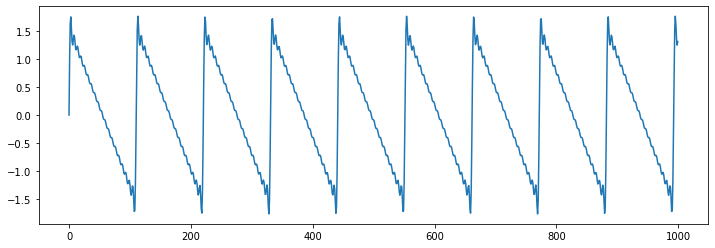

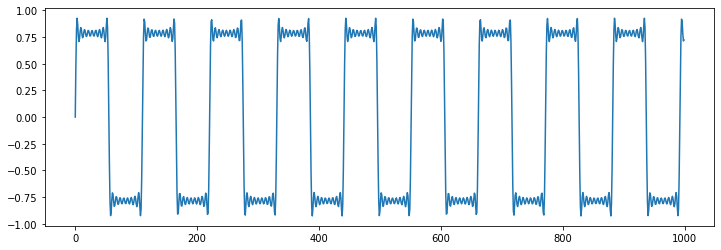

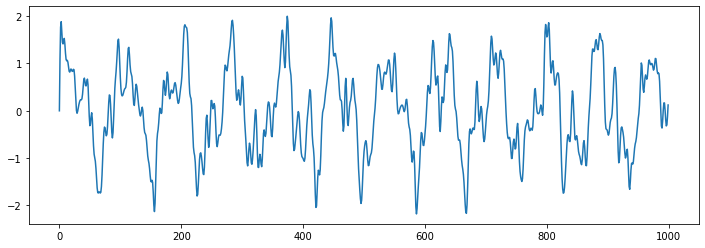

In [22]:
import math as m
f0 = 440
fs = 44100
def make_decay_note(amp,freq,dur,fs):
    tone =[]
    for n in range(0,int(dur*fs)):
        tone.append(amp * m.sin(2*m.pi*(freq/fs)*n))
    return tone

def make_tone(f0,dur,partials):
    res = np.zeros(int(dur*fs))
    for i in range(len(partials)):
        amp = partials[i][1]
        parnum = partials[i][0]*f0
        res = np.add(res,make_decay_note(amp,parnum,dur,fs))
    return res

partials0 =  [(n,1./n) for n in range(1,20)]
audio0 = make_tone(400,10,partials0)
plt.plot(audio0[:1000])
plt.figure()

partials1 =  [(n*2-1, 1./(n*2-1) ) for n in range(1,10)]
audio1 = make_tone(400,10,partials1)
plt.plot(audio1[:1000])
plt.figure()
partials2 =  [(n + np.random.random(), 1./(n)) for n in range(1,20)]
audio2 = make_tone(400,10,partials2)
plt.plot(audio2[:1000])

Audio(audio0,rate = 44100)



## Exercise 8 

Write a function that synthesizes MIDI. 

The input to your synthesizer should be a list of events, exactly as specified in Exercise 2. Each synthesized note should use `make_tone` above with the proper duration and multiplied by a decaying envelope, similarly to what you did in lab. Remember to apply the note velocity. You will also need to pick a reasonable tempo.

To test your function, use the `chopin_sequence` that you created in Exercise 2. 

The output should be a waveform that you can play with `Audio(...)`


In [25]:
def synthesize_midi(sequence, partials) :
    ons=[]
    offs=[]
    aud1=[]
    aud2=[]
    start_note=[0]*len(sequence)
    ticks = 0
    durs=[]
     
    for i in range(0,len(sequence)):
        ticks=ticks+int(sequence[i][0])
        if(sequence[i][1]=='note_on'):
            ons.append(sequence[i][3])
           
    
            start_note1=0
            for l in range(0,i):
                start_note1=start_note1+int(sequence[l][0])
               
            start_note[i]=start_note1  
          
            for n in range(i+1,len(sequence)):
                dur=0
               
                if int(sequence[n][3])==int(sequence[i][3]) and sequence[n][1]=="note_off" :
                    for k in range(i,n+1):    
                        dur=dur+int(sequence[k][0])
                    sequence[i][5]=dur
                    break            
        else:
            offs.append(sequence[i][3])
            sequence[n][5]=0
   
    samples=int(ticks/100*44100)
    aud=np.zeros(int(samples))
   
    for r in range(len(sequence)):
       
        for num, amp in partials:
            amp = amp*(int(sequence[r][4])/127)
        if sequence[r][1]=='note_on':
         
            s_n_sample=int(start_note[r]/100*44100)
            dur_sample=int(int(sequence[r][5])/100*44100)
            note=make_tone(pitch_to_freq(int(sequence[r][3])), float(float(sequence[r][5])/100), partials)
            aud[s_n_sample:s_n_sample+dur_sample]=np.add(note,aud[s_n_sample:s_n_sample+dur_sample])
    print(aud)
    return aud

In [26]:
# test it:

correct_chopin_sequence = chopin_sequence
x = synthesize_midi(correct_chopin_sequence, partials1)
Audio(x, rate=44100)




[0.         0.65182162 1.15118411 ... 0.7798999  0.75495814 0.76220931]
